Linear regression using Python
The marketing department of X prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

In [ ]:
# Load the CSV file(s) as reviews.
df_reviews = pd.read_csv('/content/x_reviews.csv')

# View the DataFrame.
df_reviews

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [ ]:
# Any missing values?
#In order to check null values in Pandas DataFrame, we use isnull() function this function return dataframe of Boolean values which are True for NaN values
df_reviews.isnull()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Explore the data.
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [ ]:
#statistics
df_reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [ ]:
df_reviews.describe(include=object)

,gender,education,language,platform,review,summary
count,2000,2000,2000,2000,2000,2000
unique,2,5,1,1,1980,1432
top,Female,graduate,EN,Web,love it,Five Stars
freq,1120,900,2000,2000,5,378


## 2. Drop columns

In [ ]:
# Drop unnecessary columns.
new_df_reviews = df_reviews.drop(columns=['gender', 'education', 'language', 'platform', 'product', 'review', 'summary'])

# View column names.
new_df_reviews.columns

Index(['age', 'remuneration (k£)', 'spending_score (1-100)', 'loyalty_points'], dtype='object')

## 3. Rename columns

In [ ]:
# Rename the column headers.
new_df_reviews.set_axis(['Age', 'Remuneration', 'Spending_score', 'loyalty_points'], axis='columns', inplace=True)

# View column names.
new_df_reviews.columns

Index(['Age', 'Remuneration', 'Spending_score', 'loyalty_points'], dtype='object')

## 4. Save the DataFrame as a CSV file

In [ ]:
# Create a CSV file as output.
new_df_reviews.to_csv('new_x_reviews.csv')

In [ ]:
# Import new CSV file with Pandas.
new_df_reviews = pd.read_csv('/content/new_x_reviews.csv')

# View DataFrame.
new_df_reviews

,Unnamed: 0,Age,Remuneration,Spending_score,loyalty_points
0,0,18,12.30,39,210
1,1,23,12.30,81,524
2,2,22,13.12,6,40
3,3,25,13.12,77,562
4,4,33,13.94,40,366
...,...,...,...,...,...
1995,1995,37,84.46,69,4031
1996,1996,43,92.66,8,539
1997,1997,34,92.66,91,5614
1998,1998,34,98.40,16,1048


## 5. Linear regression

### 5a) spending vs loyalty

In [ ]:
# Independent variable.
Independent_variable_spending = new_df_reviews['loyalty_points']

# Dependent variable.
dependent_variable_spending = new_df_reviews['Spending_score']

# OLS model and summary.
mod = smf.ols(formula='Spending_score ~ loyalty_points', data=new_df_reviews)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         Spending_score   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          2.92e-263
Time:                        10:32:34   Log-Likelihood:                -8759.4
No. Observations:                2000   AIC:                         1.752e+04
Df Residuals:                    1998   BIC:                         1.753e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         28.4260      0.685     41.

In [ ]:
# Extract the estimated parameters.

params = res.params
print('Parameters')
print(params)

# Extract the standard errors.
print('standard errors')
print(res.bse)

# Extract the predicted values.
print('predicted values')
print(res.predict(exog=None))

Parameters
Intercept         28.426033
loyalty_points     0.013671
dtype: float64
standard errors
Intercept         0.684905
loyalty_points    0.000337
dtype: float64
predicted values
[ 31.29703545  35.58986696  28.97289101 ... 105.17748592  42.75370042
  34.97465225]


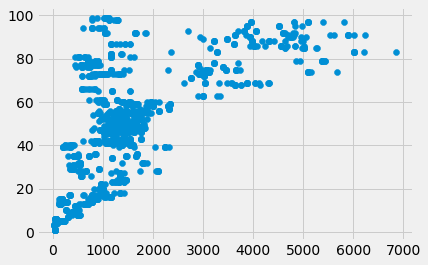

In [ ]:
# Set the X coefficient and the constant to generate the regression table.
import matplotlib.pyplot as plt
from scipy import stats
plt.scatter(Independent_variable_spending, dependent_variable_spending)

# View the output.
plt.show()

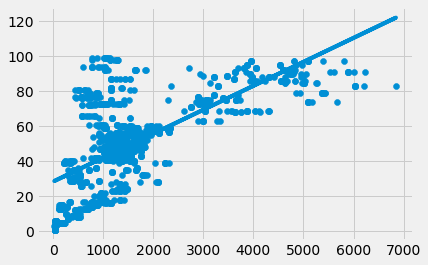

In [ ]:
# Plot the graph with a regression line.
slope, intercept, r, p, std_err = stats.linregress(Independent_variable_spending, dependent_variable_spending)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, Independent_variable_spending))

plt.scatter(Independent_variable_spending, dependent_variable_spending)
plt.plot(Independent_variable_spending, mymodel)
plt.show()

### 5b) renumeration vs loyalty

In [ ]:
Independent_variable_renum = new_df_reviews['loyalty_points']

# Dependent variable.
dependent_variable_renum = new_df_reviews['Remuneration']

# OLS model and summary.
mod2 = smf.ols(formula='Remuneration ~ loyalty_points', data=new_df_reviews)

res2 = mod2.fit()

print(res2.summary())


                            OLS Regression Results                            
Dep. Variable:           Remuneration   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          2.43e-209
Time:                        10:36:06   Log-Likelihood:                -8641.8
No. Observations:                2000   AIC:                         1.729e+04
Df Residuals:                    1998   BIC:                         1.730e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         30.5606      0.646     47.

In [ ]:
# Extract the estimated parameters.
params2 = res2.params
print('Parameters')
print(params2)

# Extract the standard errors.
print('standard errors')
print(res2.bse)

# Extract the predicted values.
print('predicted values')
print(res2.predict(exog=None))


Parameters
Intercept         30.560555
loyalty_points     0.011101
dtype: float64
standard errors
Intercept         0.645817
loyalty_points    0.000318
dtype: float64
predicted values
[32.89186761 36.3777352  31.00461446 ... 92.88431491 42.19491551
 35.87816819]


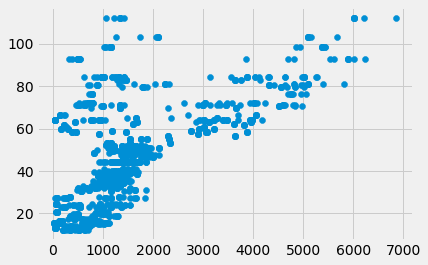

In [ ]:
# Set the the X coefficient and the constant to generate the regression table.
import matplotlib.pyplot as plt
from scipy import stats
plt.scatter(Independent_variable_renum, dependent_variable_renum)

# View the output.
plt.show()

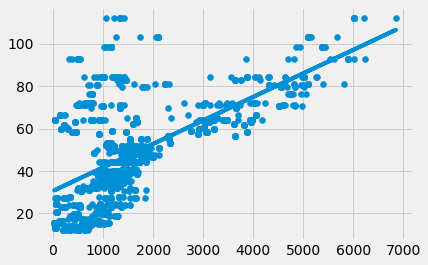

In [ ]:
# Plot graph with regression line.
slope, intercept, r, p, std_err = stats.linregress(Independent_variable_renum, dependent_variable_renum)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, Independent_variable_renum))

plt.scatter(Independent_variable_renum, dependent_variable_renum)
plt.plot(Independent_variable_renum, mymodel)
plt.show()

### 5c) age vs loyalty

In [ ]:
# Independent variable.
Independent_variable_age = new_df_reviews['loyalty_points']

# Dependent variable.
dependent_variable_age = new_df_reviews['Age']

# OLS model and summary.
mod3 = smf.ols(formula='Age ~ loyalty_points', data=new_df_reviews)

res3 = mod3.fit()

print(res3.summary())



                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Tue, 13 Sep 2022   Prob (F-statistic):             0.0577
Time:                        10:38:08   Log-Likelihood:                -8051.8
No. Observations:                2000   AIC:                         1.611e+04
Df Residuals:                    1998   BIC:                         1.612e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         40.2035      0.481     83.

In [ ]:
# Extract the estimated parameters.
params3 = res3.params
print('Parameters')
print(params3)

# Extract the standard errors.
print('standard errors')
print(res3.bse)

# Extract the predicted values.
print('predicted values')
print(res3.predict(exog=None))


Parameters
Intercept         40.203457
loyalty_points    -0.000449
dtype: float64
standard errors
Intercept         0.480816
loyalty_points    0.000236
dtype: float64
predicted values
[40.10917768 39.96820745 40.18549915 ... 37.683053   39.73295776
 39.98841019]


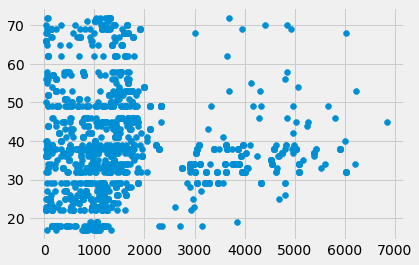

In [ ]:
# Set the X coefficient and the constant to generate the regression table.

import matplotlib.pyplot as plt
from scipy import stats
plt.scatter(Independent_variable_age, dependent_variable_age)

# View the output.
plt.show()

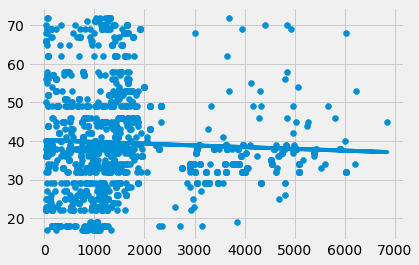

In [ ]:
# Plot graph with regression line.
slope, intercept, r, p, std_err = stats.linregress(Independent_variable_age, dependent_variable_age)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, Independent_variable_age))

plt.scatter(Independent_variable_age, dependent_variable_age)
plt.plot(Independent_variable_age, mymodel)
plt.show()

## 6. Observations and insights

***Your observations here...***

We compare three models which we created above and see their values change in a table.




In [ ]:
from statsmodels.iolib.summary2 import summary_col
result = summary_col([res,res2,res3], regressor_order=res3.params.index.tolist())
print(result)



               Spending_score Remuneration   Age   
---------------------------------------------------
Intercept      28.4260        30.5606      40.2035 
               (0.6849)       (0.6458)     (0.4808)
loyalty_points 0.0137         0.0111       -0.0004 
               (0.0003)       (0.0003)     (0.0002)
R-squared      0.4520         0.3795       0.0018  
R-squared Adj. 0.4517         0.3792       0.0013  
Standard errors in parentheses.


Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [ ]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('/content/new_x_reviews.csv')

# View DataFrame.
df2


,Unnamed: 0,Age,Remuneration,Spending_score,loyalty_points
0,0,18,12.30,39,210
1,1,23,12.30,81,524
2,2,22,13.12,6,40
3,3,25,13.12,77,562
4,4,33,13.94,40,366
...,...,...,...,...,...
1995,1995,37,84.46,69,4031
1996,1996,43,92.66,8,539
1997,1997,34,92.66,91,5614
1998,1998,34,98.40,16,1048


In [ ]:
# Drop unnecessary columns.
new_df2 = df2.drop(columns=['Age', 'loyalty_points'])

# View DataFrame.
new_df2

,Unnamed: 0,Remuneration,Spending_score
0,0,12.30,39
1,1,12.30,81
2,2,13.12,6
3,3,13.12,77
4,4,13.94,40
...,...,...,...
1995,1995,84.46,69
1996,1996,92.66,8
1997,1997,92.66,91
1998,1998,98.40,16


In [ ]:
# Explore the data.
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   Remuneration    2000 non-null   float64
 2   Spending_score  2000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 47.0 KB


In [ ]:
# Descriptive statistics.
new_df2.describe()

,Unnamed: 0,Remuneration,Spending_score
count,2000.000000,2000.000000,2000.000000
mean,999.500000,48.079060,50.000000
std,577.494589,23.123984,26.094702
min,0.000000,12.300000,1.000000
25%,499.750000,30.340000,32.000000
50%,999.500000,47.150000,50.000000
75%,1499.250000,63.960000,73.000000
max,1999.000000,112.340000,99.000000


## 2. Plot

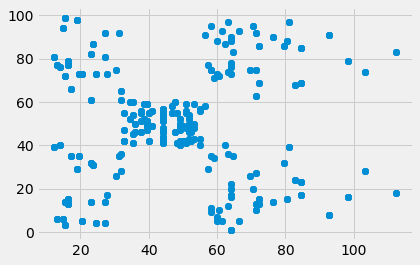

In [ ]:
# Create a scatterplot with Seaborn.

plt.scatter(new_df2["Remuneration"], new_df2["Spending_score"])

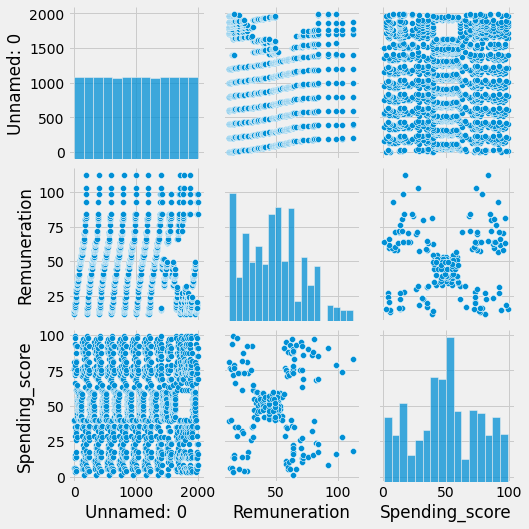

In [ ]:
# Create a pairplot with Seaborn.
sns.pairplot(new_df2)

## 3. Elbow and silhoutte methods

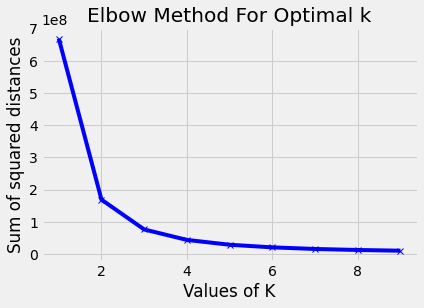

In [ ]:
# Determine the number of clusters: Elbow method.
from sklearn.cluster import KMeans
kmeans = KMeans(init='kmeans++')
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(new_df2)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances') 
plt.title('Elbow Method For Optimal k')
plt.show()

For each of the K values, we calculate average distances to the centroid across all data points.
Plot these points and find the point where the average distance from the centroid falls suddenly (“Elbow”).

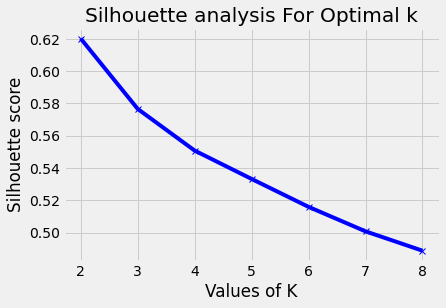

In [ ]:
# Determine the number of clusters: Silhouette method.
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(new_df2)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(new_df2, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

The value of the silhouette coefﬁcient is between [-1, 1].
A score of 1 denotes the best meaning that the data point is very compact within the cluster to which it belongs and far away from the other clusters.
The worst value is -1. Values near 0 denote overlapping clusters.

## 4. Evaluate k-means model at different values of *k*

We see that the silhouette score is maximized at k = 2. So, we will take 2 clusters.

kmeans algorithm on the standardized data with K=2.

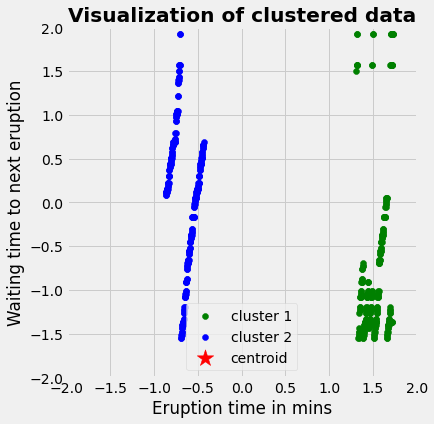

In [ ]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(new_df2)

# Run local implementation of kmeans
km = KMeans(n_clusters=2, max_iter=100)
km.fit(X_std)
centroids = kmeans.labels_

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[kmeans.labels_ == 0, 0], X_std[kmeans.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[kmeans.labels_ == 1, 0], X_std[kmeans.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[0], centroids[1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal')

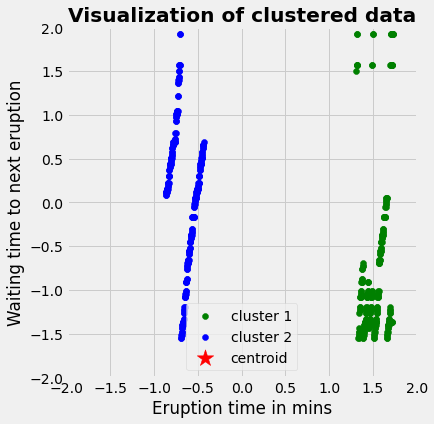

In [ ]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(new_df2)

# Run local implementation of kmeans
km = KMeans(n_clusters=6, max_iter=100)
km.fit(X_std)
centroids = kmeans.labels_

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[kmeans.labels_ == 0, 0], X_std[kmeans.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[kmeans.labels_ == 1, 0], X_std[kmeans.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[0], centroids[1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal')

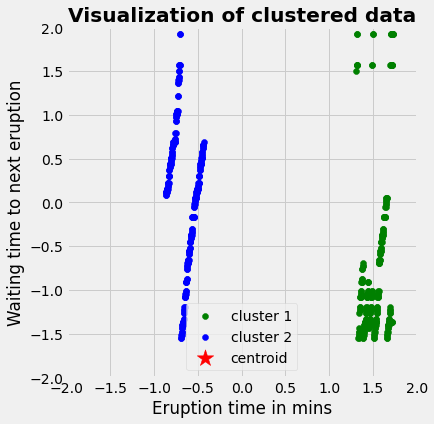

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(new_df2)

# Run local implementation of kmeans
km = KMeans(n_clusters=1, max_iter=100)
km.fit(X_std)
centroids = kmeans.labels_

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[kmeans.labels_ == 0, 0], X_std[kmeans.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[kmeans.labels_ == 1, 0], X_std[kmeans.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[0], centroids[1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal')

## 5. Fit final model and justify your choice

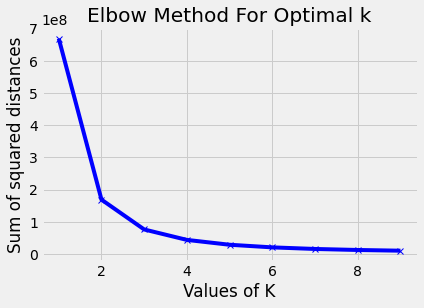

In [ ]:
# Apply the final model.
from sklearn.cluster import KMeans
kmeans = KMeans(init='kmeans++')
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(new_df2)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances') 
plt.title('Elbow Method For Optimal k')
plt.show()

The best model we choice is Elbow model.

In [ ]:
# Check the number of observations per predicted class.


## 6. Plot and interpret the clusters

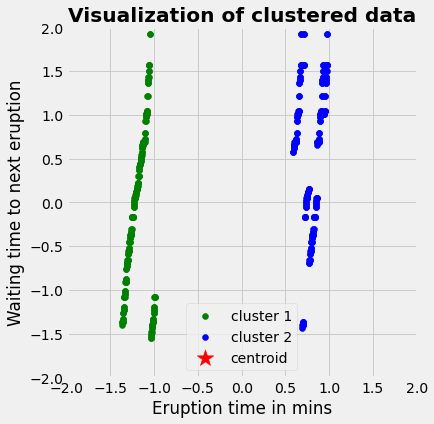

In [ ]:
# Visualising the clusters.

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(new_df2)

# Run local implementation of kmeans
km = KMeans(n_clusters=1, max_iter=100)
km.fit(X_std)
centroids = kmeans.labels_

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[kmeans.labels_ == 0, 0], X_std[kmeans.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[kmeans.labels_ == 1, 0], X_std[kmeans.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[0], centroids[1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal')
# View the DataFrame.


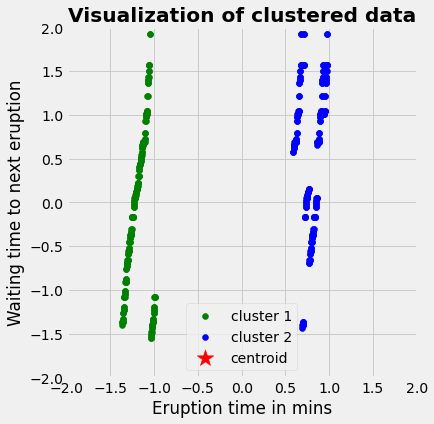

In [ ]:
# Visualising the clusters.

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(new_df2)

# Run local implementation of kmeans
km = KMeans(n_clusters=1, max_iter=100)
km.fit(X_std)
centroids = kmeans.labels_

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[kmeans.labels_ == 0, 0], X_std[kmeans.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[kmeans.labels_ == 1, 0], X_std[kmeans.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[0], centroids[1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal')

## 7. Discuss: Insights and observations

***Your observations here...***
We read the dataframe and visualize it. We use two different method to analyze the results. First is elbow methond and the second one is ilhoutte method. The result of elbow method is unique and accurate than the ilhoutte method. So, we use elbow model to demonstrate the visualization.

NLP using Python
Customer reviews were downloaded from the website of X. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [ ]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the data set as df3.

df3 = pd.read_csv('/content/x_reviews.csv')

# View DataFrame.
df3

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [ ]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [ ]:
df3.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [ ]:
# Keep necessary columns. Drop unnecessary columns.
new_df3 = df3.drop(columns=['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)', 'loyalty_points', 'education', 'language', 'platform', 'product'])

# View DataFrame.
new_df3

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [ ]:
# Determine if there are any missing values.
new_df3.isnull()

,review,summary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1995,False,False
1996,False,False
1997,False,False
1998,False,False


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [ ]:
# Review: Change all to lower case and join with a space.
import re
new_df3_review = new_df3['review'].str.lower()
# using regex() to perform task
res = [re.sub(r"(\w)([A-Z])", r"\1 \2", ele) for ele in new_df3_review]
 
# printing result
print(str(res))

["when it comes to a dm's screen, the space on the screen itself is at an absolute premium. the fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. the only reason that i gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. other than that, it drops the ball completely.", 'an open letter to galeforce9*:\n\nyour unpainted miniatures are very not bad. your spell cards are great. your board games are "meh". your dm screens, however, are freaking terrible. i\'m still waiting for a single screen that isn\'t polluted with pointless artwork where useful, reference-able tables should be. once again, you\'ve created a single use screen that is only useful when running the "storm king\'s thunder" adventure. even despite the fact that it\'s geared to that adventure path, it\'s usefulness negligible, at best. i massive swath of the inner panel is wasted

In [ ]:
# Summary: Change all to lower case and join with a space.
new_df3_summary = new_df3['summary'].str.lower()
import re
res = [re.sub(r"(\w)([A-Z])", r"\1 \2", ele) for ele in new_df3_summary]
 
# printing result
print(str(res))

['the fact that 50% of this space is wasted on art (and not terribly informative or needed art ...', "another worthless dungeon master's screen from galeforce9", 'pretty, but also pretty useless', 'five stars', 'money trap', 'five stars', 'best gm screen ever', 'five stars', 'great but could be even better', 'another missed opportunity.  not a value add to the product line.', 'five stars', 'love the map!', 'not a general dm screen', 'very weak game', 'fell completely flat...', 'five stars', 'good book', 'buckley was a card mommer', 'very advanced, but as good as it gets', "you better know what you're getting into", "don't bother", "the worst value i've ever seen", 'not enough product', 'good product but...', 'temporary tattoos were good gift.', 'huge hit', 'gorgeous pictures!', 'five stars', 'wonderful designs.', 'wow, great coloring book!!!!!!', 'nice book', 'great pictures', 'perfect!', 'well done....', 'my relaxation', 'beautiful coloring book', "the pictures are great, i've done on

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [ ]:
# Replace all the punctuations in review column.
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
res=" "
# Removing punctuations in string
# Using loop + punctuation string
for ele in new_df3_review:
    if ele not in punc:
        res+=ele
print(res)

 when it comes to a dm's screen, the space on the screen itself is at an absolute premium. the fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. the only reason that i gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. other than that, it drops the ball completely.an open letter to galeforce9*:

your unpainted miniatures are very not bad. your spell cards are great. your board games are "meh". your dm screens, however, are freaking terrible. i'm still waiting for a single screen that isn't polluted with pointless artwork where useful, reference-able tables should be. once again, you've created a single use screen that is only useful when running the "storm king's thunder" adventure. even despite the fact that it's geared to that adventure path, it's usefulness negligible, at best. i massive swath of the inner panel is wasted on artwork a

In [ ]:
# Replace all the puncuations in summary column.
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
res=" "
# Removing punctuations in string
# Using loop + punctuation string
for ele in new_df3['summary']:
    if ele not in punc:
        res+=ele
print(res)

 The fact that 50% of this space is wasted on art (and not terribly informative or needed art ...Another worthless Dungeon Master's screen from GaleForce9pretty, but also pretty uselessFive StarsMoney trapFive StarsBest gm screen everFive StarsGreat but could be even betterAnother missed opportunity.  Not a value add to the product line.Five StarsLove the map!Not a general DM screenVery weak gameFell completely flat...Five StarsGood bookBuckley was a card mommerVery advanced, but as good as it getsYou better know what you're getting intoDon't botherThe worst value I've ever seenNot enough productGood product but...Temporary Tattoos were good gift.Huge HitGorgeous pictures!Five StarsWonderful designs.WOW, GREAT COLORING BOOK!!!!!!Nice bookGreat picturesPerfect!Well done....My relaxationBeautiful coloring bookThe pictures are great, I've done one and gave it to a ...Great buy! Can't wait to work on this bookStained Glass Perfection!Four StarsSo beautiful!Great picturesVery Nice!Five Star

### 2c) Drop duplicates in both columns

In [ ]:
# Drop duplicates in both columns.

new_df3.groupby(['review', 'summary']).first()
# View DataFrame.
new_df3

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


## 3. Tokenise and create wordclouds

In [ ]:
# Create new DataFrame (copy DataFrame).

new_df3_copy = new_df3.copy()

# View DataFrame.
print(new_df3_copy)

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4

In [ ]:
import spacy.cli

spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
# Apply tokenisation to both columns.

nlp = spacy.load('en_core_web_lg')

def tokenize(text):
    return [tok.text for tok in nlp.tokenizer(text) if not tok.is_stop]

new_df3_copy['review_token'] = new_df3_copy['review'].apply(lambda x: tokenize(x))
new_df3_copy['summary_token'] = new_df3_copy['summary'].apply(lambda y: tokenize(y))
# View DataFrame.
new_df3_copy

,review,summary,review_token,summary_token
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,"[comes, DM, screen, ,, space, screen, absolute...","[fact, 50, %, space, wasted, art, (, terribly,..."
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,"[Open, Letter, GaleForce9, *, :, \n\n, unpaint...","[worthless, Dungeon, Master, screen, GaleForce9]"
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless","[Nice, art, ,, nice, printing, ., , panels, f...","[pretty, ,, pretty, useless]"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars,"[Amazing, buy, !, Bought, gift, new, dm, perfe...",[Stars]
4,As my review of GF9's previous screens these w...,Money trap,"[review, GF9, previous, screens, completely, u...","[Money, trap]"
...,...,...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom,"[perfect, word, game, mixed, ages, (, Mom, ,, ...","[perfect, word, game, mixed, ages, (, Mom]"
1996,Great game. Did not think I would like it whe...,Super fun,"[Great, game, ., , think, like, received, ,, ...","[Super, fun]"
1997,Great game for all.........\nKeeps the mind ni...,Great Game,"[Great, game, ........., \n, Keeps, mind, nimb...","[Great, Game]"
1998,fun game!,Four Stars,"[fun, game, !]",[Stars]


In [ ]:
# Review: Create a word cloud.
wordcloud_review = WordCloud().generate(str(new_df3_review))

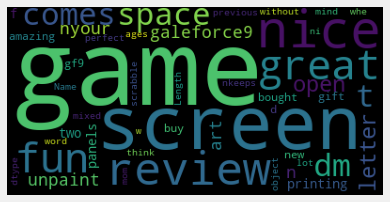

In [ ]:
# Review: Plot the WordCloud image.
plt.imshow(wordcloud_review)
plt.axis("off")
plt.show()

In [ ]:
# Summary: Create a word cloud.
wordcloud_summary = WordCloud().generate(str(new_df3_summary))

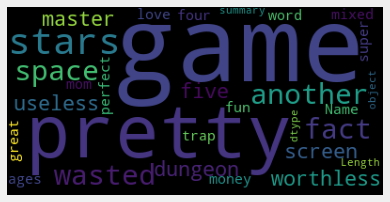

In [ ]:
# Summary: Plot the WordCloud image.
plt.imshow(wordcloud_summary)
plt.axis("off")
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

review freq. table


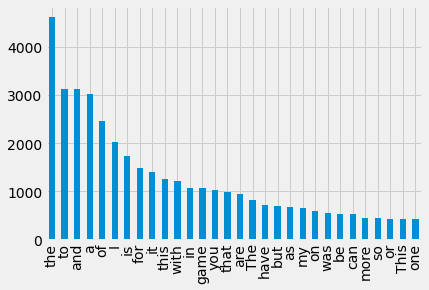

In [ ]:
# Determine the frequency distribution.
print('review freq. table')
df_word_freq = new_df3['review'].str.split(expand=True).stack().value_counts()
df_word_freq.head(30).plot.bar()

summary frequency Table


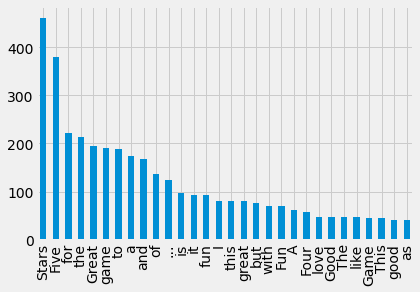

In [ ]:
print('summary frequency Table')
df_word_freq = new_df3['summary'].str.split(expand=True).stack().value_counts()
df_word_freq.head(30).plot.bar()

### 4b) Remove alphanumeric characters and stopwords

In [ ]:
# Delete all the alpanum.
new_df3_copy['review'].str.replace(r'^(?:[A-Za-z-]+\d|[\d-]+[A-Za-z])[\w-]*\s*', '', regex=True)

0       When it comes to a DM's screen, the space on t...
1       An Open Letter to GaleForce9*:\n\nYour unpaint...
2       Nice art, nice printing.  Why two panels are f...
3       Amazing buy! Bought it as a gift for our new d...
4       As my review of GF9's previous screens these w...
                              ...                        
1995    The perfect word game for mixed ages (with Mom...
1996    Great game.  Did not think I would like it whe...
1997    Great game for all.........\nKeeps the mind ni...
1998                                            fun game!
1999    This game is fun. A lot like scrabble without ...
Name: review, Length: 2000, dtype: object

In [ ]:
new_df3_copy['summary'].str.replace(r'^(?:[A-Za-z-]+\d|[\d-]+[A-Za-z])[\w-]*\s*', '', regex=True)

0       The fact that 50% of this space is wasted on a...
1       Another worthless Dungeon Master's screen from...
2                         pretty, but also pretty useless
3                                              Five Stars
4                                              Money trap
                              ...                        
1995       The perfect word game for mixed ages (with Mom
1996                                            Super fun
1997                                           Great Game
1998                                           Four Stars
1999                                       Love this game
Name: summary, Length: 2000, dtype: object

In [ ]:
# Remove all the stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
new_df3_copy_review_stop = new_df3_copy["review"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))
new_df3_copy_summary_stop = new_df3_copy["summary"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))
new_df3_copy_stop = pd.concat([new_df3_copy_review_stop, new_df3_copy_summary_stop], axis=1)
print(new_df3_copy_stop)

                                                 review  \
0     when comes dm's screen, space screen absolute ...   
1     an open letter galeforce9*: your unpainted min...   
2     nice art, nice printing. why two panels filled...   
3              amazing buy! bought gift new dm perfect!   
4     as review gf9's previous screens completely un...   
...                                                 ...   
1995  the perfect word game mixed ages (with mom, pe...   
1996  great game. did think i would like first recei...   
1997         great game all......... keeps mind nimble!   
1998                                          fun game!   
1999  this game fun. a lot like scrabble without lit...   

                                                summary  
0     the fact 50% space wasted art (and terribly in...  
1     another worthless dungeon master's screen gale...  
2                           pretty, also pretty useless  
3                                            five stars  
4

### 4c) Create wordcloud without stopwords

In [ ]:
# Create a wordcloud without stop words.
wordcloud_summary_stop = WordCloud().generate(str(new_df3_copy_stop))

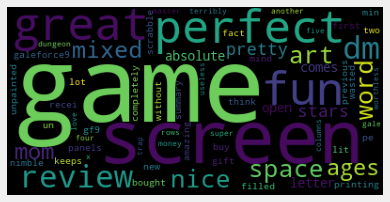

In [ ]:
# Plot the wordcloud image.
plt.imshow(wordcloud_summary_stop)
plt.axis("off")
plt.show()

### 4d) Identify 15 most common words and polarity

                                                    Frequency
Word                                                         
love                                                        9
great game                                                  5
cute                                                        4
great!                                                      3
good                                                        3
as expected                                                 3
good product                                                2
great                                                       2
love these!                                                 2
awesome                                                     2
nice                                                        2
on-time nice item.                                          2
this set slightly worse earlier ones (in old se...          2
great expansion great game.                                 2
cute!   

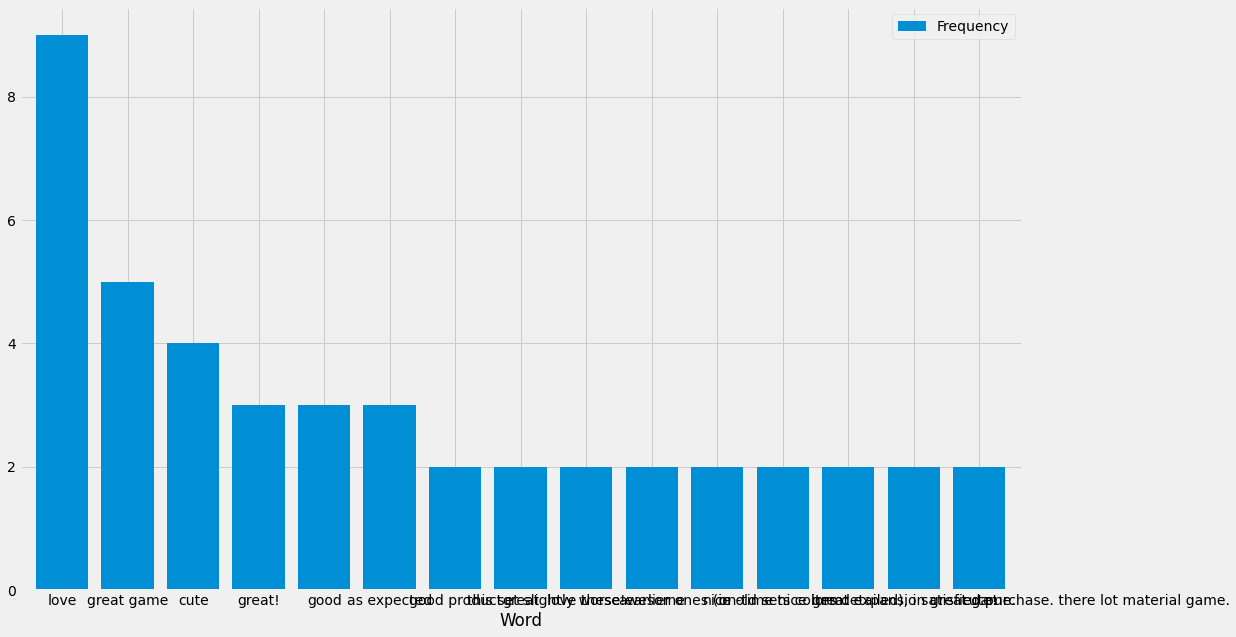

In [ ]:
# Determine the 15 most common words.
top_N=15
import matplotlib
from collections import Counter
# generate DF out of Counter
rslt = pd.DataFrame(Counter(new_df3_copy_stop['review']).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)

                 Frequency
Word                      
five stars             378
four stars              57
great game              16
three stars             14
two stars               12
fun game                12
great!                   9
great expansion          9
one star                 8
awesome                  8
fun                      8
fun!                     7
super fun                6
cute                     5
great game!              5


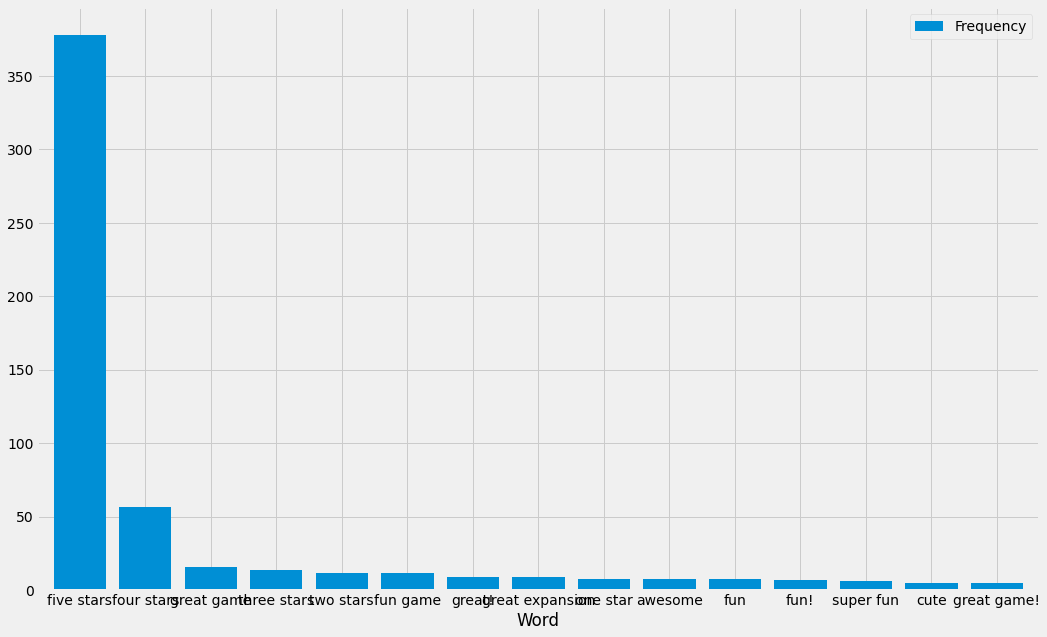

In [ ]:
rslt = pd.DataFrame(Counter(new_df3_copy_stop['summary']).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [ ]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [ ]:
# Determine polarity of both columns. 
new_df3_copy_review_polarity = new_df3_copy['review'].apply(generate_polarity)
new_df3_copy_summary_polarity = new_df3_copy['summary'].apply(generate_polarity)
# View output.
new_df3_copy_polarity = pd.concat([new_df3_copy_review_polarity, new_df3_copy_summary_polarity], axis=1)
print(new_df3_copy_polarity)

        review   summary
0    -0.036111  0.150000
1     0.035952 -0.800000
2     0.116640  0.000000
3     0.628788  0.000000
4    -0.316667  0.000000
...        ...       ...
1995  0.233929  0.200000
1996  0.158333  0.316667
1997  0.150000  0.200000
1998 -0.100000  0.000000
1999 -0.095833  0.050000

[2000 rows x 2 columns]


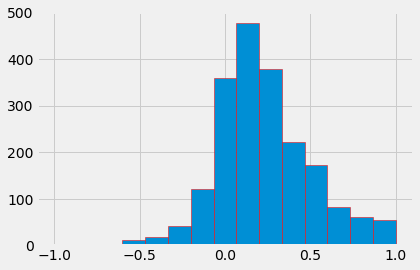

In [ ]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
plt.hist(new_df3_copy_review_polarity, edgecolor="red", bins=15)
plt.show()
# Histogram of sentiment score


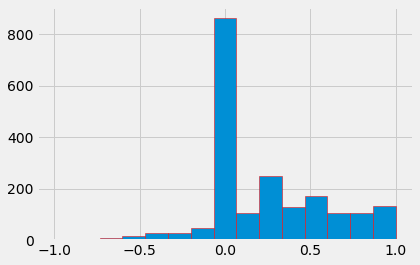

In [ ]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
plt.hist(new_df3_copy_summary_polarity, edgecolor="red", bins=15)
plt.show()

# Histogram of sentiment score


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [ ]:
# Top 20 negative reviews.
Positive_words = ['good', 'great'] 
Negative_words = ['terrible','bad']

new_df3_copy['positive words'] = new_df3_copy['review'].str.count('|'.join(Positive_words))
new_df3_copy['negative words'] = new_df3_copy['review'].str.count('|'.join(Negative_words))

conditions = [
(new_df3_copy['negative words'] > new_df3_copy['positive words'])
]

choices = [
'negative',
]

new_df3_copy['overall'] = np.select(conditions, choices, default = '')

final = new_df3_copy[new_df3_copy['overall'].str.strip().astype(bool)]
final_review = final.drop(columns=['summary', 'review_token', 'summary_token'])
# View output.

final_review

,review,positive words,negative words,overall
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,1,2,negative
13,This is one of the worst games I have ever pla...,0,1,negative
119,but definitly NOT... tiny book.. make robot ...,0,1,negative
337,Only buy this for an adult who is super patien...,0,1,negative
439,I love this game!! I bought this for my seven ...,0,1,negative
551,"My son loves the books, but was very disappoin...",0,1,negative
852,"firstly, this game is EXCELLENT! the previous ...",0,1,negative
879,"Whenever I see this game on my shelf, I get a ...",0,1,negative
883,The game itself is really fun. Acquire has be...,0,1,negative
899,The Game is amazing.\nThe new version is not.\...,0,1,negative


In [ ]:
# Top 20 negative summaries.
Positive_words = ['good', 'great'] 
Negative_words = ['terrible','bad']

new_df3_copy['positive words'] = new_df3_copy['summary'].str.count('|'.join(Positive_words))
new_df3_copy['negative words'] = new_df3_copy['summary'].str.count('|'.join(Negative_words))

conditions = [
(new_df3_copy['negative words'] > new_df3_copy['positive words'])
]

choices = [
'negative',
]

new_df3_copy['overall'] = np.select(conditions, choices, default = '')

final = new_df3_copy[new_df3_copy['overall'].str.strip().astype(bool)]
final_summary = final.drop(columns=['review', 'review_token', 'summary_token'])
# View output.

final_summary

# View output.


,summary,positive words,negative words,overall
885,"Too bad, this is not what I was expecting.",0,1,negative
1161,"Not a bad set, but with limited applicability.",0,1,negative


In [ ]:
# Top 20 positive reviews.

Positive_words = ['good', 'great'] 
Negative_words = ['terrible','bad']

new_df3_copy['positive words'] = new_df3_copy['review'].str.count('|'.join(Positive_words))
new_df3_copy['negative words'] = new_df3_copy['review'].str.count('|'.join(Negative_words))

conditions = [
(new_df3_copy['positive words'] > new_df3_copy['negative words'])
]

choices = [
'positive'
]


new_df3_copy['overall'] = np.select(conditions, choices, default = '')

final = new_df3_copy[new_df3_copy['overall'].str.strip().astype(bool)]
final_review = final.drop(columns=['summary', 'review_token', 'summary_token'])
# View output.

final_review[:20]
# View output.


,review,positive words,negative words,overall
8,Could be better but its still great. I love th...,1,0,positive
17,When I unexpectedly came across a picture of B...,3,0,positive
25,My young son was thrilled to have tattoos just...,1,0,positive
36,"The pictures are great , I've done one and gav...",1,0,positive
38,"Holy cow! Ok, so we use Sharpies to color, and...",2,0,positive
41,"Wow, great images on vellum, got this for my h...",1,0,positive
44,Absolutely great pictures even before coloring!,1,0,positive
45,Great purchase and got it in good time.,1,0,positive
53,"Exactly as described, nice pictures, great tra...",1,0,positive
56,Sometimes you need something new and special t...,1,0,positive


In [ ]:
# Top 20 positive summaries.


Positive_words = ['good', 'great'] 
Negative_words = ['terrible','bad']

new_df3_copy['positive words'] = new_df3_copy['summary'].str.count('|'.join(Positive_words))
new_df3_copy['negative words'] = new_df3_copy['summary'].str.count('|'.join(Negative_words))

conditions = [
(new_df3_copy['positive words'] > new_df3_copy['negative words'])
]

choices = [
'positive'
]


new_df3_copy['overall'] = np.select(conditions, choices, default = '')

final = new_df3_copy[new_df3_copy['overall'].str.strip().astype(bool)]
final_review = final.drop(columns=['review', 'review_token', 'summary_token'])
# View output.

final_review[:20]
# View output.

,summary,positive words,negative words,overall
18,"Very advanced, but as good as it gets",1,0,positive
24,Temporary Tattoos were good gift.,1,0,positive
36,"The pictures are great, I've done one and gave...",1,0,positive
53,"nice pictures, great transaction",1,0,positive
57,great!,1,0,positive
69,This is a great book to throw in your bag to h...,1,0,positive
88,This was a great little activity book,1,0,positive
91,However it is a great idea.,1,0,positive
105,"great scenes, but not many of them",1,0,positive
137,"good, but not a good price",2,0,positive


## 7. Discuss: Insights and observations

***Your observations here...***
We get the dataset and read it. We perform several task on it which are described in the exercise. We clean the text by using stopwords, lowercase etc. We Visaulize the results of stop words and word clouds.

# 